## EDA ON NASDAQ DATASET ON APPLE , AMAZON , IBM , MICROSOFT , TESLA

### We have collected dataset from NASDAQ portal for five diffrent companies (Apple, Amazon , Ibm , Microsoft ,Tesla) for last 6 months. 

In [101]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [102]:
#Loading Data
stock_data_apple = pd.read_csv('AAPL_histdata.csv')
stock_data_apple['Symbol']='Apple'
stock_data_amazon = pd.read_csv('AMZN_histdata.csv')
stock_data_amazon['Symbol']='Amazon'
stock_data_ibm = pd.read_csv('IBM_histdata.csv')
stock_data_ibm['Symbol']='IBM'
stock_data_microsoft = pd.read_csv('MSFT_histdata.csv')
stock_data_microsoft['Symbol']='Microsoft'
stock_data_tesla = pd.read_csv('TSLA_histdata.csv')
stock_data_tesla['Symbol']='Tesla'


In [103]:
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
company_list=[stock_data_apple,stock_data_amazon,stock_data_ibm,stock_data_microsoft,stock_data_tesla]
for company in company_list:
    stock_data=company
    #removing the dollar sign and "volume column" from the stock_data
    stock_data['Close']=stock_data['Close/Last'].str.replace('$','')
    stock_data.drop('Close/Last',inplace=True, axis=1)
    stock_data['Open'] = stock_data['Open'].str.replace('$', '')
    stock_data['High'] = stock_data['High'].str.replace('$', '')
    stock_data['Low'] = stock_data['Low'].str.replace('$', '')
    #setting type of fiels to float
    stock_data['Open'] = stock_data['Open'].astype(float)
    stock_data['High'] = stock_data['High'].astype(float)
    stock_data['Low'] = stock_data['Low'].astype(float)
    stock_data['Close'] = stock_data['Close'].astype(float)
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])

<ipython-input-103-34fdfcb6b735>:7: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-103-34fdfcb6b735>:9: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-103-34fdfcb6b735>:10: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-103-34fdfcb6b735>:11: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



#### combining stock data along Axis 0

In [104]:
stock_data_combined = pd.concat([stock_data_apple,stock_data_amazon,stock_data_ibm,stock_data_microsoft,stock_data_tesla], axis=0)

In [105]:
stock_data_combined.head(10)

,Date,Volume,Open,High,Low,Symbol,Close
0,2021-09-24,53477870,145.66,147.4701,145.5600,Apple,146.92
1,2021-09-23,64838170,146.65,147.0800,145.6400,Apple,146.83
2,2021-09-22,76404340,144.45,146.4300,143.7001,Apple,145.85
3,2021-09-21,75833960,143.93,144.6000,142.7800,Apple,143.43
4,2021-09-20,123478900,143.80,144.8400,141.2700,Apple,142.94
5,2021-09-17,129868800,148.82,148.8200,145.7600,Apple,146.06
6,2021-09-16,68034150,148.44,148.9700,147.2210,Apple,148.79
7,2021-09-15,83281320,148.56,149.4400,146.3700,Apple,149.03
8,2021-09-14,109296300,150.35,151.0700,146.9100,Apple,148.12
9,2021-09-13,102404300,150.63,151.4200,148.7500,Apple,149.55


#### checking the shape (dimensions) of our data


In [106]:
stock_data_combined.shape

(635, 7)

#### Statistics about data

In [107]:
stock_data_combined.describe()

,Volume,Open,High,Low,Close
count,6.350000e+02,635.000000,635.000000,635.000000,635.000000
mean,2.760753e+07,920.440100,929.380610,911.287242,920.744583
std,3.065290e+07,1247.788801,1258.251773,1236.684546,1247.893859
min,1.680306e+06,120.110000,120.403100,118.860000,119.900000
25%,3.862551e+06,143.725000,144.755000,142.505000,143.665000
50%,1.861658e+07,266.185000,267.850000,265.470000,266.690000
75%,3.313646e+07,713.350000,724.450000,704.105000,714.195000
max,1.511010e+08,3744.000000,3773.078200,3696.792900,3731.410000


#### Checking for null values

In [108]:
stock_data_combined.isnull().sum()


Date      0
Volume    0
Open      0
High      0
Low       0
Symbol    0
Close     0
dtype: int64

In [109]:
stock_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635 entries, 0 to 126
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    635 non-null    datetime64[ns]
 1   Volume  635 non-null    int64         
 2   Open    635 non-null    float64       
 3   High    635 non-null    float64       
 4   Low     635 non-null    float64       
 5   Symbol  635 non-null    object        
 6   Close   635 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 39.7+ KB


#### Line plot showing close price of each company

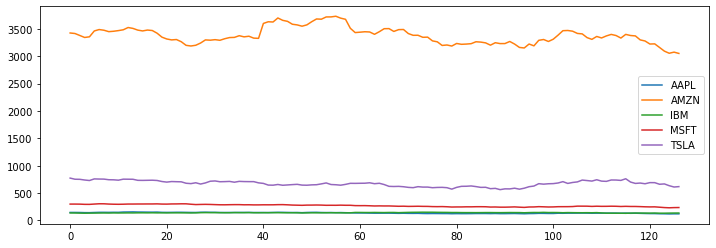

In [110]:
plt.figure(figsize=(12,8))
tickers=['AAPL','AMZN','IBM','MSFT','TSLA']
for tick in tickers:
    stock_data_combined_multiindex[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

#### line plot showing open price of each company

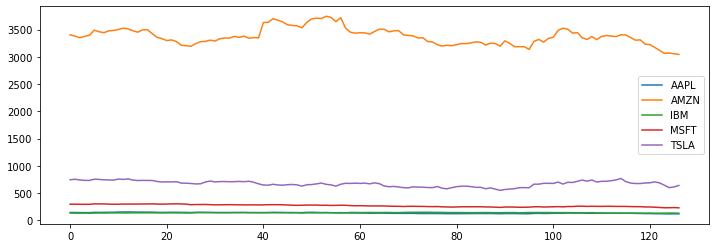

In [111]:
plt.figure(figsize=(12,8))
tickers=['AAPL','AMZN','IBM','MSFT','TSLA']
for tick in tickers:
    stock_data_combined_multiindex[tick]['Open'].plot(figsize=(12,4),label=tick)
plt.legend()

#### Visualization of volume of stocks

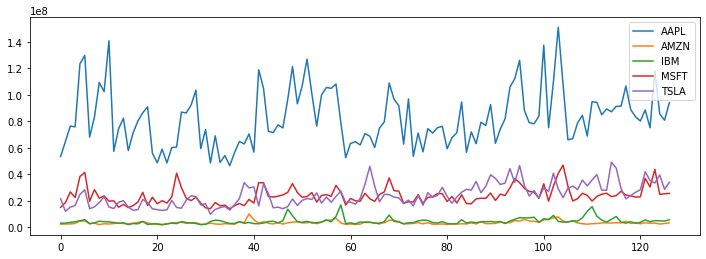

In [112]:
plt.figure(figsize=(12,8))
tickers=['AAPL','AMZN','IBM','MSFT','TSLA']
for tick in tickers:
     stock_data_combined_multiindex[tick]['Volume'].plot(figsize=(12,4),label=tick)
plt.legend()

### Apple Stock Data

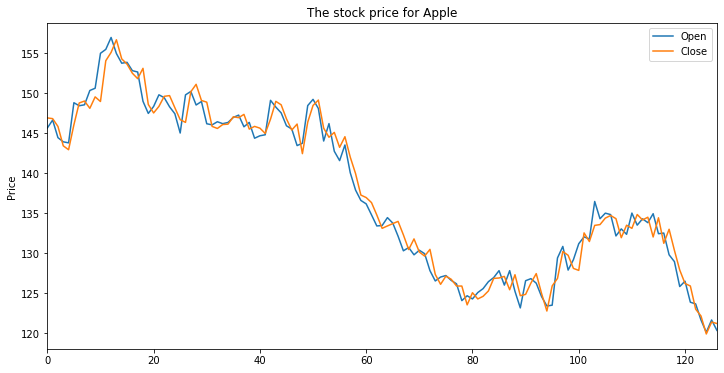

In [113]:
#plotting the open and close value of apple
title = 'The stock price for Apple'
ylabel='Price'
ax = stock_data_apple[['Open','Close']].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);

#### Apple shows an almost synchronous open and close value over the period.

### Amazon Stock Data

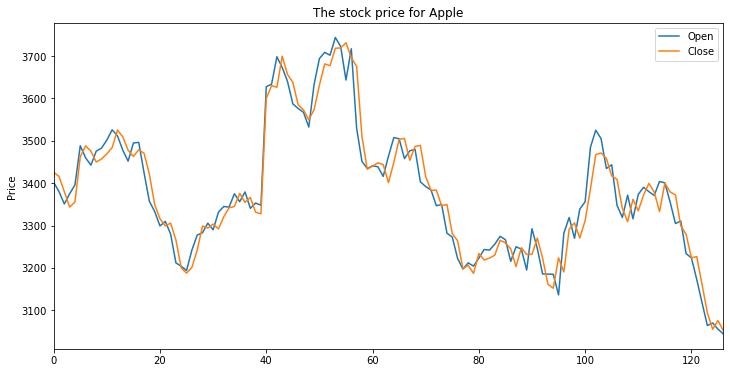

In [114]:
#plotting the open and close value of Amazon
title = 'The stock price for Apple'
ylabel='Price'
ax = stock_data_amazon[['Open','Close']].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);

#### Amazon shows an almost synchronous open and close value over the period.

#### Ibm Stock Data

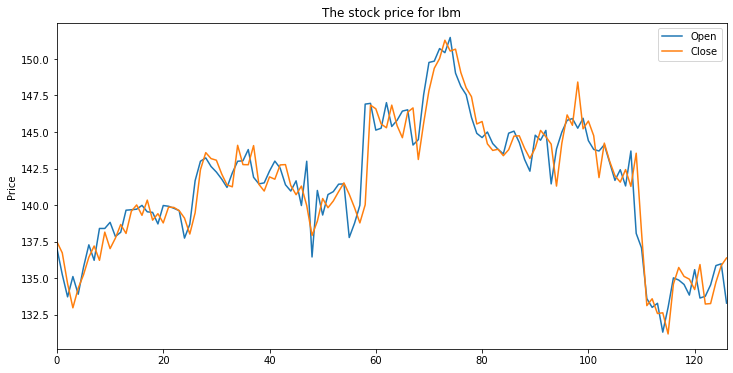

In [115]:
#plotting the open and close value of Ibm
title = 'The stock price for Ibm'
ylabel='Price'
ax = stock_data_ibm[['Open','Close']].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);

#### Ibm shows an almost synchronous open and close value over the period.

### Microsoft Stock Data

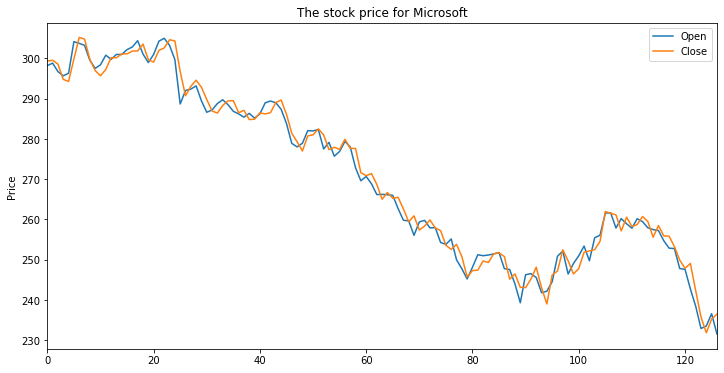

In [116]:
#plotting the open and close value of Microsoft
title = 'The stock price for Microsoft'
ylabel='Price'
ax = stock_data_microsoft[['Open','Close']].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);

#### Microsoft shows an almost synchronous open and close value over the period.

### Tesla Stock Data 

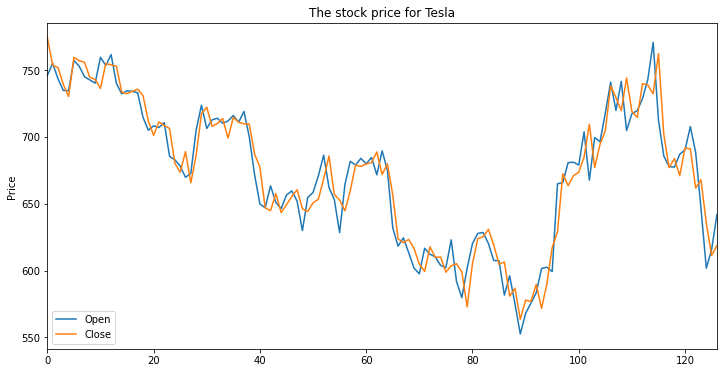

In [117]:
#plotting the open and close value of Tesla
title = 'The stock price for Tesla'
ylabel='Price'
ax = stock_data_tesla[['Open','Close']].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);

#### Tesla shows an almost synchronous open and close value over the period.